# Домашнее задание №9. Часть 1.


**_Комментарий: _**Эта и последующие домашние работы будут связаны с участием в конкурсе.

Вам нужно:

1.	Зарегистрироваться на сайте [www.sascompetitions.ru](https://sascompetitions.ru/)
2.	В меню сайта _«Конкурсы»_ найти единственный активный конкурс – _«Прогнозирование вероятности невозврата кредита»_. Примите в нем участие (для этого там есть _кнопка_).
3. Ознакомитесь с условиями конкурса и призами.
    - Какую метрику качества модели используют для оценки результатов участников?
4.	Потратьте 12 минут на просмотр [видео](http://video.sas.com/detail/videos/analytics-in-action/video/4363855630001/introduction-to-roc-curves-and-proc-logistic ), где подробно рассказано про эту метрику и связанные с ней возможности **proc logistic**. 
5.	Скачайте данные. Прочитайте их описание в разделе _«Описание набора данных»_.
    - Что нужно предсказать?
    - Какая переменная – целевая?
    - Какое целевое событие (значение целевой переменной) нужно прогнозировать?
6.	Скачайте простейший пример обработки данных конкурса в разделе _«NEW! Код стартовой модели на SAS»_.

    _Обратите внимание_:         
        -  Среди скачанных файлов два основных для нас: _train.csv_ (здесь мы знаем целевую переменную) и _test.csv_ (здесь мы не знаем целевую переменную). Нам нужно спрогнозировать эту целевую переменную (точнее – проставить вероятность наступления целевого события) с помощью построенной модели – это будет наш результат, наше решение, его мы публикуем [кнопка _«Прислать решение»_]). Пример результата есть в данных, то, как его создать, есть в коде. 
        - 	Сначала мы делим всю выборку (train.csv) на две части (proc surveyselect): тренировочная **_Train_** (здесь мы строим нашу модель – обучаем ее) и валидационная (в коде называется **_Valid_**)  – именно на этой части мы можем посмотреть на «честную» оценку качества нашей модели. Мы ожидаем, что качество модели на этом тестовом наборе будет такое же как на test.csv (или наоборот).
7.	Почитайте вопросы/ответы на форуме конкурса! 
8.	Заставьте код отработать без ошибок (кажется он без ошибок), затем:
    - Посмотрите, какого качества получилась лучшая модель (мы смотрим на наборе Valid). На каком месте в рейтинге участников Вы бы оказались с таким качеством модели?
    - Используя настройки пошаговых методов выбора переменных, постарайтесь построить модель лучше. 
    - Используя перебор всех подмножеств переменных, постарайтесь построить модель еще лучше.
    - Опубликуйте свой результат. Укажите ниже Ваш псевдоним (чтобы я мог найти Ваш результат в списке участников на сайте) и точность которой, вы достигли.


Псевдоним:... Результат:...  

**Ниже** ваш весь код, который строит Вашу модель от импорта до экспорта.

In [2]:
/* Ваш ответ - код на SAS Base здесь, не забудьте его запустить ;) */


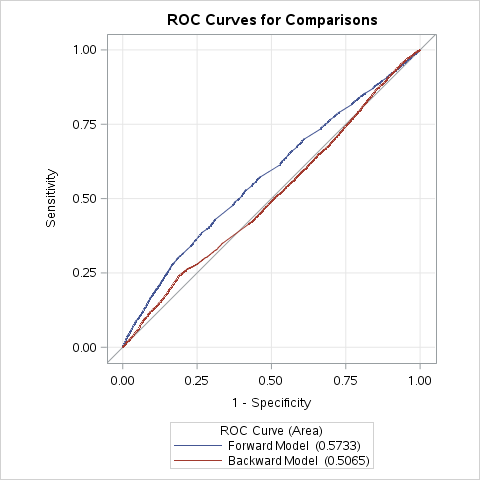
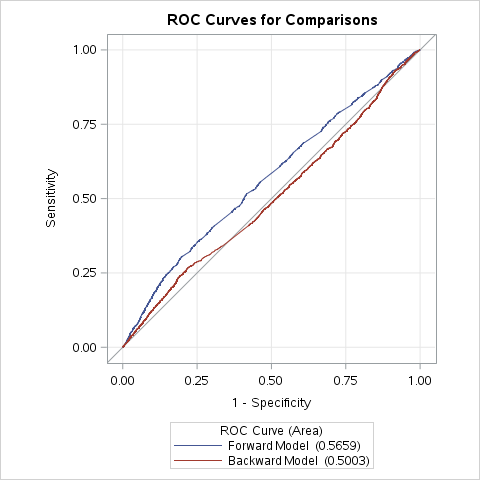

In [2]:
/* Macro function for Simply Data Preparation. It generates a PROC SQL steps. 
The parameter in the first position is InputDataset, which represents the SAS input dataset for this function (Train or Test).
The parameter in the second position is OutputDataset, which represents the SAS output dataset (result of data preparation).
The third parameter is main_vars. This variable used for define ID with or without response variable (DEF in this case)*/



%macro Simply_Data_Preparation(InputDataset, OutputDataset, main_vars);
	proc sql;
		create table SetWithFlags as
			select &&&main_vars., max(AMT_CREDIT_SUM) as MAX_AMT_CREDIT, min(AMT_CREDIT_SUM) as MIN_AMT_CREDIT, 
			max(CREDIT_ACTIVE) as CREDIT_ACTIVE, max(CREDIT_COLLATERAL) as CREDIT_COLLATERAL,
			(case
				when CREDIT_CURRENCY in ("usd", "eur", "chf", "jpy") then 1
				else 0 end
			) as FLAG_CREDIT_CURRENCY_FOREIGN,		
			(case
				when CREDIT_TYPE in (0, 1, 2, 3, 4) then 1
				when CREDIT_TYPE in (5, 6, 7, 8, 9, 10, 11, 12, 13, 14) then 2
				when CREDIT_TYPE in (15, 16, 17, 18, 19, 90, 99) then 3 end
			) as FLAG_CREDIT_TYPE,
			(case
				when substr((TEXT_PAYMENT_DISCIPLINE), 1,1) in ("0", "C", "X" ) then 1
				when substr((TEXT_PAYMENT_DISCIPLINE), 1,1) in ("1", "2", "3") then 2
				when substr((TEXT_PAYMENT_DISCIPLINE), 1,1) in ("4", "5") then 3
				end 
			) as FLAG_TEXT,
			max(CREDIT_DAY_OVERDUE) as CREDIT_DAY_OVERDUE, max(AMT_CREDIT_MAX_OVERDUE) as AMT_CREDIT_MAX_OVERDUE, 
			max(CNT_CREDIT_PROLONG) as CNT_CREDIT_PROLONG, max(AMT_CREDIT_SUM_DEBT) as AMT_CREDIT_SUM_DEBT, 
			max(AMT_CREDIT_SUM_LIMIT) as AMT_CREDIT_SUM_LIMIT, max(AMT_CREDIT_SUM_OVERDUE) as AMT_CREDIT_SUM_OVERDUE, 
			max(CREDIT_DELAY30) as CREDIT_DELAY30, max(CREDIT_DELAY5)as CREDIT_DELAY5, max(CREDIT_DELAY60) as CREDIT_DELAY60, 
			max(CREDIT_DELAY90) as CREDIT_DELAY90, max(CREDIT_DELAY_MORE) as CREDIT_DELAY_MORE, max(AMT_REQ_SOURCE_HOUR) as AMT_REQ_SOURCE_HOUR, 
			max(AMT_REQ_SOURCE_DAY) as AMT_REQ_SOURCE_DAY, max(AMT_REQ_SOURCE_WEEK) as AMT_REQ_SOURCE_WEEK, max(AMT_REQ_SOURCE_MON) as AMT_REQ_SOURCE_MON, 
			max(AMT_REQ_SOURCE_QRT) as AMT_REQ_SOURCE_QRT, max(AMT_REQ_SOURCE_YEAR) as AMT_REQ_SOURCE_YEAR, max(AMT_ANNUITY) as AMT_ANNUITY
			from &InputDataset.
			group by ID;
	quit;

	proc sql;
		create table &OutputDataset. as
		select &&&main_vars., max(FLAG_CREDIT_CURRENCY_FOREIGN) as FLAG_CREDIT_CURRENCY_FOREIGN, max(FLAG_CREDIT_TYPE) as FLAG_CREDIT_TYPE, 
		max(FLAG_TEXT) as FLAG_TEXT, CREDIT_DAY_OVERDUE, AMT_CREDIT_MAX_OVERDUE, CNT_CREDIT_PROLONG, AMT_CREDIT_SUM_DEBT, 
		AMT_CREDIT_SUM_LIMIT, AMT_CREDIT_SUM_OVERDUE, CREDIT_DELAY30, CREDIT_DELAY5, CREDIT_DELAY60, CREDIT_DELAY90, CREDIT_DELAY_MORE, 
		AMT_REQ_SOURCE_HOUR, AMT_REQ_SOURCE_DAY , AMT_REQ_SOURCE_WEEK, AMT_REQ_SOURCE_MON, AMT_REQ_SOURCE_QRT, AMT_REQ_SOURCE_YEAR, AMT_ANNUITY

		from SetWithFlags
		group by &&&main_vars., CREDIT_DAY_OVERDUE, AMT_CREDIT_MAX_OVERDUE, CNT_CREDIT_PROLONG, AMT_CREDIT_SUM_DEBT, 
		AMT_CREDIT_SUM_LIMIT, AMT_CREDIT_SUM_OVERDUE, CREDIT_DELAY30, CREDIT_DELAY5, CREDIT_DELAY60, CREDIT_DELAY90, 
		CREDIT_DELAY_MORE, AMT_REQ_SOURCE_HOUR, AMT_REQ_SOURCE_DAY , AMT_REQ_SOURCE_WEEK, AMT_REQ_SOURCE_MON, 
		AMT_REQ_SOURCE_QRT, AMT_REQ_SOURCE_YEAR, AMT_ANNUITY;
	quit;

	proc sql;
		drop table SetWithFlags;
	quit;
	
	%replacement_missing_values(&OutputDataset., AMT_CREDIT_MAX_OVERDUE);
	%replacement_missing_values(&OutputDataset., AMT_CREDIT_SUM_DEBT);
	%replacement_missing_values(&OutputDataset., AMT_CREDIT_SUM_LIMIT);
	%replacement_missing_values(&OutputDataset., AMT_ANNUITY);
  
%mend Simply_Data_Preparation;

/* Macro function for replacement missing values with 0. It generates a PROC SQL steps.
The first parameter of this macro is Dataset, it represents the SAS dataset in which  
the second parameter of this macro (value) is replaced.
*/
	
%macro replacement_missing_values(Dataset, value); 
	data &Dataset.; 
	set &Dataset.; 
	if &value. eq '.' then &value. = 0; 
	run; 
%mend replacement_missing_values;

/* Load Train Data*/
proc import datafile='/folders/myfolders/HW9/train.csv'
            out=TrainHomecredit
            dbms=dlm 
            replace; 
            datarow = 2; 
            delimiter = ','; 
	    	getnames = yes;
run;

/* Load Test Data*/
proc import datafile='/folders/myfolders/HW9/test.csv'
            out=TestHomecredit
            dbms=dlm 
            replace; 
            datarow = 2; 
            delimiter = ','; 
	    	getnames = yes;
run;

/* Simply Data Preparation*/

/* Macro variables are used to store and manipulate character strings*/
%let main_variables_train = ID, DEF;
%let macro_main_variables_train = main_variables_train;
%let main_variable_test = ID;
%let macro_main_variable_test = main_variable_test;

/* Run macro function*/
%Simply_Data_Preparation(TrainHomecredit,TrainResult, &macro_main_variables_train);
%Simply_Data_Preparation(TestHomecredit,TestResult, &macro_main_variable_test);

/* Sort the data by the target in preparation for stratified sampling*/
proc sort data=TrainResult out=TrainResult; 
   by DEF; 
run;

/* The SURVEYSELECT procedure will perform stratified sampling on
any variable in the STRATA  statement. The OUTALL option   
specifies that you want a flag appended to the file to indicate 
selected records, not simply a file comprised of the selected  
records.*/
proc surveyselect noprint ranuni
                  data = TrainResult 
                  samprate=.6667 
                  out=TrainResult
                  seed=44444
                  outall;
   	strata DEF;
run;

/* Verify stratification */
proc freq data = TrainResult;
  tables DEF*selected;
run;

/* Create training and validation data sets */
data Train Valid;
   set TrainResult;
   if selected then output Train;
   else output Valid;
run;

/* Macro variable for all avaliable variables*/
%let all_variables =  FLAG_CREDIT_CURRENCY_FOREIGN FLAG_CREDIT_TYPE FLAG_TEXT CREDIT_DAY_OVERDUE 
AMT_CREDIT_MAX_OVERDUE CNT_CREDIT_PROLONG AMT_CREDIT_SUM_DEBT AMT_CREDIT_SUM_LIMIT AMT_CREDIT_SUM_OVERDUE 
CREDIT_DELAY30 CREDIT_DELAY5 CREDIT_DELAY60 CREDIT_DELAY90 CREDIT_DELAY_MORE AMT_REQ_SOURCE_HOUR 
AMT_REQ_SOURCE_DAY AMT_REQ_SOURCE_WEEK AMT_REQ_SOURCE_MON AMT_REQ_SOURCE_QRT AMT_REQ_SOURCE_YEAR AMT_ANNUITY;

/*ods html close;*/
ods output spearmancorr=spearman
           hoeffdingcorr=hoeffding;

proc corr data=train
    spearman 
    hoeffding
    rank;
   	var &all_variables;
   	with DEF;
run;
/*ods html;*/

/* Macro variable for all reduced variables*/
%let reduced_vars = AMT_CREDIT_MAX_OVERDUE CREDIT_DELAY30 CREDIT_DELAY5	AMT_CREDIT_SUM_DEBT	AMT_REQ_SOURCE_YEAR	AMT_CREDIT_SUM_LIMIT AMT_ANNUITY CREDIT_DELAY60	FLAG_CREDIT_TYPE FLAG_TEXT AMT_CREDIT_SUM_OVERDUE CREDIT_DAY_OVERDUE CREDIT_DELAY_MORE;

/* STEPWISE selection */
proc logistic data=train;
 	STEPWISE:
 	model DEF (event='1')= &reduced_vars   
	/ selection=stepwise;
run;

/* FORWARD selection */
proc logistic data=train;
	FORWARD: 
	model DEF (event='1')=&reduced_vars
	/ selection=forward;
run;

/* BACKWARD selection */
proc logistic data=train;
	BACKWARD: 
	model DEF (event='1')=&reduced_vars
	/ selection=backward;
run;

/* Macro variable for logistic regressions*/
%let model_back = CREDIT_DAY_OVERDUE AMT_CREDIT_MAX_OVERDUE AMT_ANNUITY CREDIT_DELAY60 AMT_CREDIT_SUM_OVERDUE AMT_CREDIT_SUM_DEBT;
%let model_stepwise = FLAG_TEXT FLAG_CREDIT_TYPE CREDIT_DELAY30 AMT_REQ_SOURCE_YEAR CREDIT_DELAY_MORE AMT_CREDIT_SUM_LIMIT CREDIT_DELAY5;
%let model_forward = FLAG_TEXT FLAG_CREDIT_TYPE CREDIT_DELAY30 AMT_REQ_SOURCE_YEAR CREDIT_DELAY_MORE AMT_CREDIT_SUM_LIMIT CREDIT_DELAY5;


/*Get results for Train Data by forward regression*/
proc logistic data=train noprint;
   model DEF(event='1')= &model_forward;
   score data=train out=train_forward_out(rename=(p_1= p_mod_Forward));         
run;

/*Get results for Train Data by backward regression*/
proc logistic data=train noprint;
   model DEF(event='1')=&model_back;
   score data=train_forward_out out=train_forward_and_back_out(rename=(p_1=p_mod_Back));         
run;

/*Get Statistic Information for Train Data*/
ods select ROCOverlay ROCAssociation ROCContrastTest;
proc logistic data=train_forward_and_back_out;
   model DEF(event='1')=p_mod_Forward  p_mod_Back/ nofit;
   roc "Forward Model" p_mod_Forward;
   roc "Backward Model" p_mod_Back;
   roccontrast "Comparing the Two Models";
   title "Validation Data Set Performance TRAIN";
run;

/*Get results for Validation Data by forward regression*/
proc logistic data=train noprint;
   model DEF(event='1')=&model_forward;
   score data=valid out=valid_forward_out(rename=(p_1=p_mod_Forward ));         
run;

/*Get results for Validation Data by backward regression*/
proc logistic data=train noprint;
   model DEF(event='1')=&model_back;
   score data=valid_forward_out out=valid_forward_and_back_out(rename=(p_1=p_mod_Back));         
run;

/*Get Statistic Information for Valid Data*/
ods select ROCOverlay ROCAssociation ROCContrastTest;
proc logistic data=valid_forward_and_back_out;
   model DEF(event='1')=p_mod_Forward p_mod_Back/ nofit;
   roc "Forward Model" p_mod_Forward;
   roc "Backward Model" p_mod_Back;
   roccontrast "Comparing the Two Models";
   title "Validation Data Set Performance VALID";
run;

/*Get predict information for Test Data, where p_1 - probability of default*/
proc logistic data=train noprint;
   model DEF(event='1')= &model_forward;
   score data=TestResult out=Result(rename=(p_1= Score) keep=id p_1);         
run;

%replacement_missing_values(Result, Score);

/* Export Result Data Set to CSV File*/
proc export data=Result
     outfile="/folders/myfolders/HW9/Result.csv"
     dbms=csv 
     replace;
run;



